In [ ]:
import os
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import pandas as pd

In [7]:
# Load the dataset
x = np.load('pose_landmarks_dataset.npy')
y = np.load('pose_landmarks_labels.npy')

In [8]:
# Split data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Initialize label encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, TimeDistributed
from keras.optimizers import Adam

num_classes = len(np.unique(y_train_encoded))

In [15]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 127ms/step - accuracy: 0.1969 - loss: 2.0093 - val_accuracy: 0.3094 - val_loss: 1.7827
Epoch 2/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.2975 - loss: 1.8244 - val_accuracy: 0.2986 - val_loss: 1.7148
Epoch 3/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.3111 - loss: 1.7221 - val_accuracy: 0.3186 - val_loss: 1.6737
Epoch 4/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.3197 - loss: 1.7168 - val_accuracy: 0.3169 - val_loss: 1.6313
Epoch 5/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.3294 - loss: 1.6537 - val_accuracy: 0.3703 - val_loss: 1.4923
Epoch 6/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.3554 - loss: 1.5847 - val_accuracy: 0.3686 - val_loss: 1.4302
Epoch 7/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.3635 - loss: 1.4554 - val_accuracy: 0.4195 - val_loss: 1.2982
Epoch 8/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.4066 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.7904 - loss: 0.5396 - val_accuracy: 0.7531 - val_loss: 0.6324
Epoch 336/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.7909 - loss: 0.5107 - val_accuracy: 0.7556 - val_loss: 0.6512
Epoch 337/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.7826 - loss: 0.5479 - val_accuracy: 0.7498 - val_loss: 0.6352
Epoch 338/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.7906 - loss: 0.5175 - val_accuracy: 0.7665 - val_loss: 0.6202
Epoch 339/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - accuracy: 0.8053 - loss: 0.5215 - val_accuracy: 0.7598 - val_loss: 0.6852
Epoch 340/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.8156 - loss: 0.4866 - val_accuracy: 0.7431 - val_loss: 0.6583
Epoch 341/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.7865 - loss: 0.5315 - val_accuracy: 0.7798 - val_loss: 0.5972
Epoch 342/600
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.7796

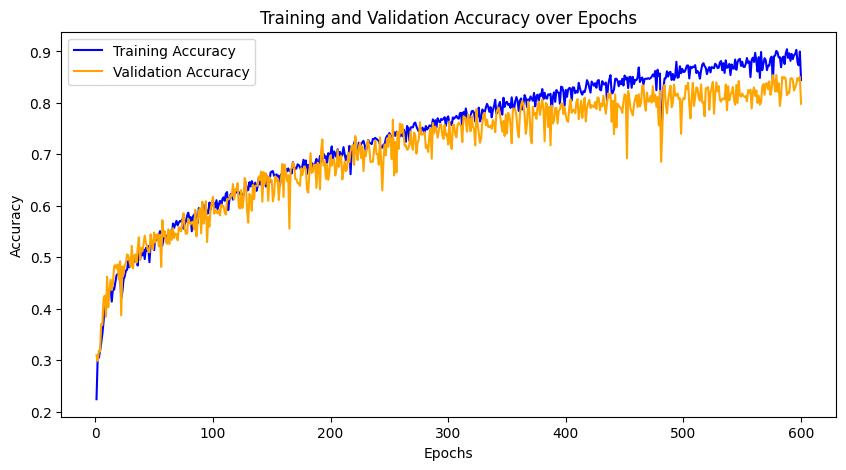

In [16]:
# Train the model and store the training history
history = model.fit(x_train, y_train_encoded, 
                    validation_data=(x_val, y_val_encoded), 
                    epochs=600, batch_size=32)

# Extract accuracy and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')

# Label the graph
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

TensorFlow/Keras Model Validation Accuracy: 0.8582
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
              precision    recall  f1-score   support

     1. loud       0.89      0.86      0.87       253
    2. quiet       0.94      0.96      0.95       236
    3. happy       0.87      0.87      0.87       229
      4. sad       0.81      0.86      0.84        95
5. Beautiful       0.72      0.76      0.74        99
     6. Ugly       0.81      0.81      0.81       119
     7. Deaf       0.81      0.82      0.81        87
    8. Blind       0.86      0.77      0.81        81

    accuracy                           0.86      1199
   macro avg       0.84      0.84      0.84      1199
weighted avg       0.86      0.86      0.86      1199



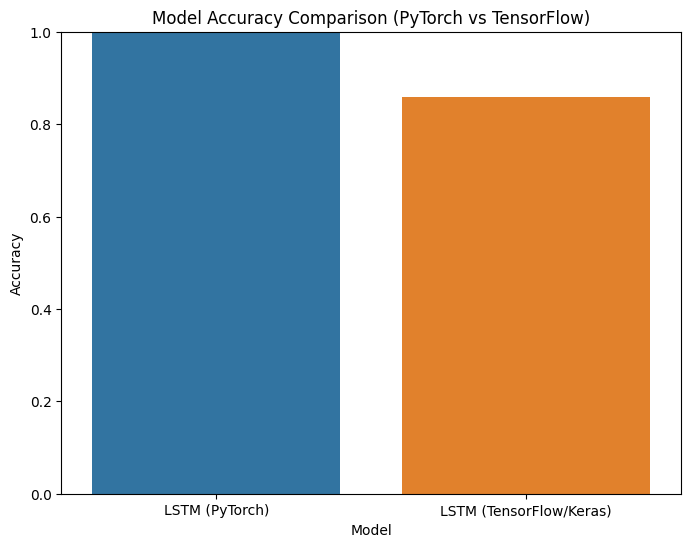

In [ ]:
# Evaluate the TensorFlow/Keras model on the validation set 
loss, tf_keras_val_accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(f'TensorFlow/Keras Model Validation Accuracy: {tf_keras_val_accuracy:.4f}')

# Generate predictions for the validation set
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report for the TensorFlow/Keras model
print(classification_report(y_val_encoded, y_pred_classes, target_names=label_encoder.classes_))

In [ ]:
# Save the entire model
model.save('tf_model.h5')

Epoch 1/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.8908 - loss: 0.3107 - val_accuracy: 0.8424 - val_loss: 0.5433
Epoch 2/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9129 - loss: 0.2456 - val_accuracy: 0.8198 - val_loss: 0.6076
Epoch 3/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9007 - loss: 0.2742 - val_accuracy: 0.8048 - val_loss: 0.7060
Epoch 4/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.8783 - loss: 0.3415 - val_accuracy: 0.8324 - val_loss: 0.5403
Epoch 5/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.8990 - loss: 0.2799 - val_accuracy: 0.8232 - val_loss: 0.6366
Epoch 6/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9035 - loss: 0.2674 - val_accuracy: 0.8190 - val_loss: 0.5979
Epoch 7/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9019 - loss: 0.2749 - val_accuracy: 0.8407 - val_loss: 0.5478
Epoch 8/400
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.9035 -

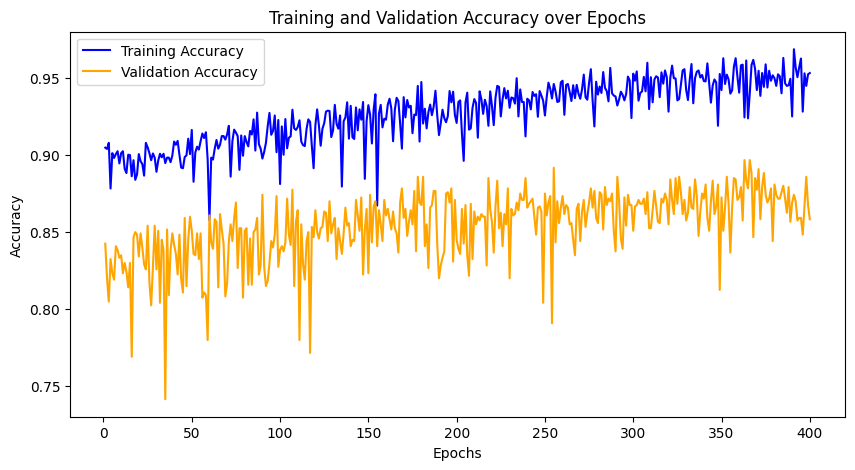

In [19]:
# Train the model and store the training history
history = model.fit(x_train, y_train_encoded, 
                    validation_data=(x_val, y_val_encoded), 
                    epochs=400, batch_size=32)

# Extract accuracy and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')

# Label the graph
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()